# Deep Learning to Predict Hurricanes

We're going to try and use weather data from the atlantic to predict when storms might occur. To do this we take monthly tempe

In [22]:
import pandas as pd
import os

# load in dataframes containing the datas of the typhoons and hurricanes and the daily temperature records for
# the florida weather stations
daily_temps_df = pd.read_csv("weather_station_temps/all_stations_temp.csv") # dataframe containing daily 
                                                                            # temperatures for weather stations

    
typhoon_df = pd.read_csv("typhoon_data/cleaned_typhoon_data.csv") # dataframe containing dates of hurricanes
                                                                  # and typhoons

typhoon_df.head()

,Unnamed: 0,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,41257,AL042000,UNNAMED,20000808,1200,,TD,28.2,74.2,30,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,41258,AL042000,UNNAMED,20000808,1800,,TD,28.1,75.1,30,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,41259,AL042000,UNNAMED,20000809,0,,TD,28.0,76.0,30,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,41260,AL042000,UNNAMED,20000809,600,,TD,27.9,76.8,30,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,41261,AL042000,UNNAMED,20000809,1200,,TD,27.9,77.4,30,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [23]:
import pandas as pd
import os

# load in dataframes containing the datas of the typhoons and hurricanes and the daily temperature records for
# the florida weather stations
daily_temps_df = pd.read_csv("weather_station_temps/all_stations_temp.csv") # dataframe containing daily 
                                                                            # temperatures for weather stations

    
typhoon_df = pd.read_csv("typhoon_data/cleaned_typhoon_data.csv") # dataframe containing dates of hurricanes
                                                                  # and typhoons

typhoon_df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Date', 'Time', 'Event', 'Status',
       'Latitude', 'Longitude', 'Maximum Wind', 'Minimum Pressure',
       'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW',
       'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW',
       'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW',
       'High Wind NW'],
      dtype='object')

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


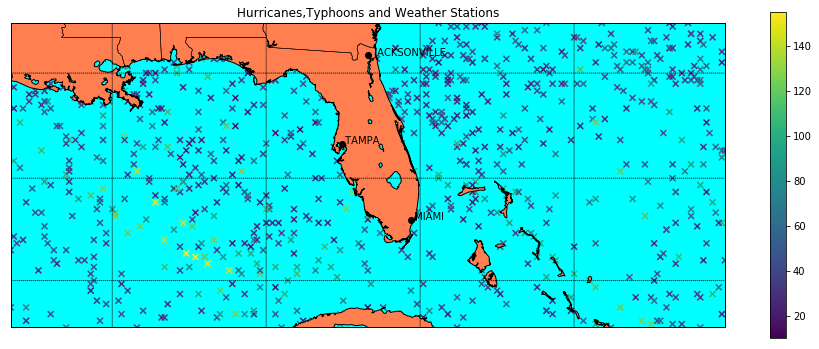

In [24]:
from mpl_toolkits.basemap import Basemap
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.cm import ScalarMappable


plt.figure(figsize=(16,6))
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# lat_ts is the latitude of true scale.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='merc',llcrnrlat=22.6,urcrnrlat=31.4,\
            llcrnrlon=-93.3,urcrnrlon=-70.1,lat_ts=10,resolution='i')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,3.))
m.drawmeridians(np.arange(-180.,181.,5.))
m.drawmapboundary(fill_color='aqua')
m.drawstates()
#x,y = map(typhoon_df["Longitude"],typhoon_df["Latitude"])p
x,y = m(list(typhoon_df["Longitude"]*-1),list(typhoon_df["Latitude"]))

m.scatter(x,y,c= typhoon_df["Maximum Wind"].values,marker = "x")
plt.colorbar()
weather_station_longitudes,weather_station_latitudes = m([-81.6879,-80.2870,-82.5371], [30.4941,25.7959,27.9835])
weather_station_labels = ["JACKSONVILLE","MIAMI","TAMPA"]
m.plot(weather_station_longitudes,weather_station_latitudes,marker = "o",linestyle=" ",c= "black")
plt.annotate('  JACKSONVILLE', xy=(weather_station_longitudes[0], weather_station_latitudes[0]),\
             xytext=(weather_station_longitudes[0], weather_station_latitudes[0]))
plt.annotate(' TAMPA', xy=(weather_station_longitudes[2], weather_station_latitudes[2]),\
             xytext=(weather_station_longitudes[2], weather_station_latitudes[2]))
plt.annotate(' MIAMI', xy=(weather_station_longitudes[1], weather_station_latitudes[1]),\
             xytext=(weather_station_longitudes[1], weather_station_latitudes[1]))

plt.title("Hurricanes,Typhoons and Weather Stations")
plt.show()

In [25]:
import tensorflow as tf

def f2_score(y_true, y_pred):
    y_true = tf.cast(y_true, "int32")
    y_pred = tf.cast(tf.round(y_pred), "int32") # implicit 0.5 threshold via tf.round
    y_correct = y_true * y_pred
    sum_true = tf.reduce_sum(y_true, axis=1)
    sum_pred = tf.reduce_sum(y_pred, axis=1)
    sum_correct = tf.reduce_sum(y_correct, axis=1)
    precision = sum_correct / sum_pred
    recall = sum_correct / sum_true
    f_score = 5 * precision * recall / (4 * precision + recall)
    f_score = tf.where(tf.is_nan(f_score), tf.zeros_like(f_score), f_score)
    return tf.reduce_mean(f_score)

def precision(y_true, y_pred):
    y_true = tf.cast(y_true, "int32")
    y_pred = tf.cast(tf.round(y_pred), "int32") # implicit 0.5 threshold via tf.round
    y_correct = y_true * y_pred
    sum_pred = tf.reduce_sum(y_pred, axis=1)
    sum_correct = tf.reduce_sum(y_correct, axis=1)
    precision = sum_correct / sum_pred
    return tf.reduce_mean(precision)

def recall(y_true, y_pred):
    y_true = tf.cast(y_true, "int32")
    y_pred = tf.cast(tf.round(y_pred), "int32") # implicit 0.5 threshold via tf.round
    y_correct = y_true * y_pred
    sum_true = tf.reduce_sum(y_true, axis=1)
    sum_correct = tf.reduce_sum(y_correct, axis=1)
    recall = sum_correct / sum_true
    return tf.reduce_mean(recall)

There's quite a lot going on around there! Now we're going to create a dataframe to put our features and labels into which we can use to train our model. For now, we'll use the previous few days of data to make predictions about whether or not a hurricane/typhoon occured on a given day.

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(units=80, activation='sigmoid', input_dim=59))
model.add(Dropout(0.5))
model.add(Dense(units=80, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(units=2, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])


In [27]:
import keras
labels_and_features_df = pd.read_csv("labels_and_features.csv")
labels_arr = labels_and_features_df["label"]
labels_arr = keras.utils.to_categorical(labels_arr, 2)
features_arr = np.array(labels_and_features_df[labels_and_features_df.columns[2:-2]])
num_hur = len(labels_and_features_df.loc[labels_and_features_df['label'] == 1])
print((len(features_arr)-num_hur)/num_hur)
print(num_hur)
print(len(features_arr)-num_hur)
#print(labels_and_features_df.columns)
#print(labels_and_features_df.head())

16.140625
256
4132


Here we will randomly select 256 no hurricane days so that we have a balanced data set. 

In [28]:
import random

no_hurricane=labels_and_features_df.loc[labels_and_features_df['label'] == 0]
hurricane=labels_and_features_df.loc[labels_and_features_df['label'] == 1]
arg_new_samples=random.sample(range(1, len(no_hurricane)), num_hur)
selected_no_hurricane=no_hurricane.iloc[arg_new_samples]
new_features=pd.concat([hurricane,selected_no_hurricane],ignore_index=True)
new_features=new_features.sample(frac=1).reset_index(drop=True)
labels_arr = new_features["label"]
labels_arr = keras.utils.to_categorical(labels_arr, 2)
features_arr = np.array(new_features[new_features.columns[2:-2]])
num_hur = len(labels_and_features_df.loc[labels_and_features_df['label'] == 1])
print((len(features_arr)-num_hur)/num_hur)
print(num_hur)
print(len(features_arr)-num_hur)

1.0
256
256


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class_weight = {0:1,1:1}
X_train, X_test, y_train, y_test = train_test_split(features_arr, labels_arr, test_size=0.10)
scaler = StandardScaler()
scaler.fit(X_train)  # Don't cheat - fit only on training data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

history = model.fit(X_train,y_train,epochs = 50,validation_split=0.10,class_weight=class_weight)

Train on 414 samples, validate on 46 samples
Epoch 1/50
414/414 [==============================] - 0s 469us/step - loss: 0.8155 - acc: 0.5314 - val_loss: 0.6365 - val_acc: 0.6522
Epoch 2/50
414/414 [==============================] - 0s 98us/step - loss: 0.6711 - acc: 0.6159 - val_loss: 0.5728 - val_acc: 0.6957
Epoch 3/50
414/414 [==============================] - 0s 103us/step - loss: 0.6186 - acc: 0.6667 - val_loss: 0.5116 - val_acc: 0.6957
Epoch 4/50
414/414 [==============================] - 0s 94us/step - loss: 0.6590 - acc: 0.6353 - val_loss: 0.5052 - val_acc: 0.6739
Epoch 5/50
414/414 [==============================] - 0s 103us/step - loss: 0.6593 - acc: 0.6425 - val_loss: 0.5074 - val_acc: 0.6957
Epoch 6/50
414/414 [==============================] - 0s 98us/step - loss: 0.5892 - acc: 0.7029 - val_loss: 0.5067 - val_acc: 0.6957
Epoch 7/50
414/414 [==============================] - 0s 108us/step - loss: 0.6217 - acc: 0.6739 - val_loss: 0.5055 - val_acc: 0.6957
Epoch 8/50
414/414 [

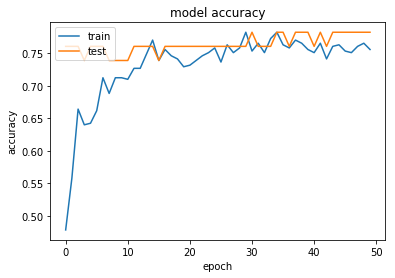

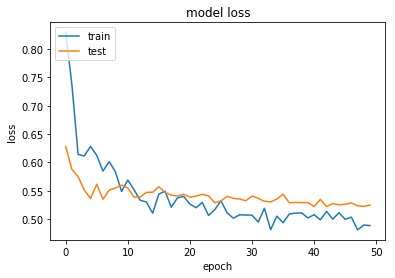

In [18]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Learning curves look good and we don't seem to be overfiting. Lets look at the confusion matrix and a few metrics.

Confusion matrix, without normalization
[[15  8]
 [ 4 25]]


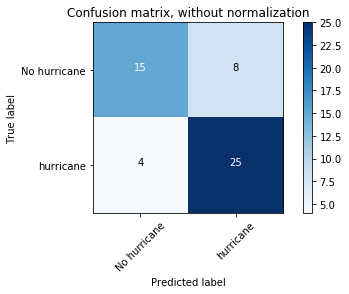

Normalized confusion matrix
[[ 0.65217391  0.34782609]
 [ 0.13793103  0.86206897]]


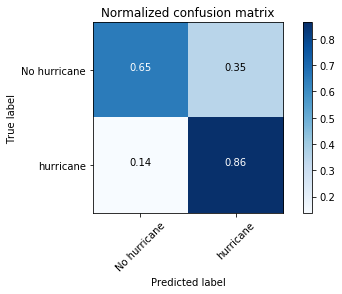

In [30]:
from sklearn.metrics import confusion_matrix
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
y_prob=model.predict(X_test)
y_pred = y_prob.argmax(axis=-1)
y_test_labels = y_test.argmax(axis=-1)
cnf_matrix=confusion_matrix(y_test_labels, y_pred)
class_names = ['No hurricane','hurricane']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()


In [31]:
metric_arr = model.evaluate(X_test,y_test)
print("Loss: " + str(metric_arr[0]), "\nAccuracy: " + str(metric_arr[1]))



52/52 [==============================] - 0s 56us/step
Loss: 0.461598203732 
Accuracy: 0.769230764646


In [32]:
from sklearn.metrics import classification_report
target_names=['no hurricane','hurricane']
print(classification_report(y_test_labels, y_pred, target_names=target_names))

              precision    recall  f1-score   support

no hurricane       0.79      0.65      0.71        23
   hurricane       0.76      0.86      0.81        29

 avg / total       0.77      0.77      0.77        52

